Import libraries, and make sure **librosa** is installed using the command "pip install librosa"

In [8]:
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from st_tools import make_soundtypes
import IPython

In [9]:
N_COEFF = 14
ST_RATIO = .9
INPUT_FILE = 'samples/bass.wav'
N_FRAMES = 500
FRAME_SIZE = 1024
HOP_SIZE = 512
MAX_LOOPS = 3 
SR = 44100

In [10]:
IPython.display.Audio(INPUT_FILE)

In [15]:
if __name__ == "__main__":
    print ('[soundtypes - probabilistic generation]\n')
    print ('computing features...')
    [y, sr] = librosa.core.load(INPUT_FILE, SR)
    y_pad = np.zeros(len(y) + FRAME_SIZE)
    y_pad[1:len(y)+1] = y
    C = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_COEFF, n_fft=FRAME_SIZE, 
                             hop_length=HOP_SIZE)

    print ('multidimensional scaling...')
    mds = MDS(2)
    C_scaled = mds.fit_transform (C.T)

    print ('computing soundtypes...')
    (dictionary, markov, centroids, labels) = \
        make_soundtypes(C_scaled, ST_RATIO)
    n_clusters = centroids.shape[0]

    print (markov)
    print ('generate new sequence...')
    w1 = np.random.randint (n_clusters)
    prev_w1 = 0
    loops = 0
    gen_sequence = []
    gen_sound = np.zeros(N_FRAMES * HOP_SIZE + FRAME_SIZE)
    for i in range(N_FRAMES):
        l = markov[(w1)]
        if len(l) == 0:
            w1 = np.random.randint(n_clusters)
        else:
            w1 = l[np.random.randint(len(l))]
        if prev_w1 == w1:
            loops += 1
            
        if loops > MAX_LOOPS:
            w1 = np.random.randint(n_clusters)
            loops = 0
            
        gen_sequence.append(w1)
        p = dictionary[(w1)]
        atom = p[np.random.randint(len(p))]

        chunk = y_pad[atom*HOP_SIZE:atom*HOP_SIZE+FRAME_SIZE] \
            * np.hanning(FRAME_SIZE)
        gen_sound[i*HOP_SIZE:i*HOP_SIZE+FRAME_SIZE] += chunk

    print ('saving audio data...')
    sf.write('generated_sound.wav', gen_sound, sr)

    plt.close ('all')

[soundtypes - probabilistic generation]

computing features...
multidimensional scaling...
computing soundtypes...
{47: [1218], 1218: [1090], 1090: [283], 283: [655], 655: [588], 588: [255], 255: [100], 100: [304, 440], 304: [429], 429: [762], 762: [292, 822], 292: [1206], 1206: [792], 792: [883], 883: [688], 688: [1194], 1194: [58], 58: [1123], 1123: [327], 327: [716], 716: [243, 661], 243: [799], 799: [1257], 1257: [1062], 1062: [988], 988: [1035], 1035: [863], 863: [644], 644: [1271], 1271: [503], 503: [690, 344], 690: [43], 43: [1134], 1134: [388], 388: [1191], 1191: [1033], 1033: [1055], 1055: [492], 492: [1074], 1074: [818], 818: [811], 811: [432], 432: [910], 910: [1059], 1059: [216], 216: [1244], 1244: [813], 813: [139], 139: [428], 428: [860, 1146], 860: [1048], 1048: [393], 393: [325], 325: [594], 594: [399], 399: [293], 293: [245, 121], 245: [886], 886: [262], 262: [248], 248: [1183, 118], 1183: [1176], 1176: [1166], 1166: [702], 702: [1247], 1247: [355], 355: [1053, 1006], 

Text(0.5, 1.0, 'points and centroids')

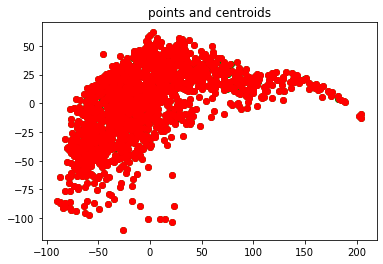

In [12]:
plt.figure ()
plt.plot (C_scaled[:, 0], C_scaled[:, 1], 'go')
plt.plot (centroids[:, 0], centroids[:, 1], 'ro')
plt.title('points and centroids')

Text(0.5, 1.0, 'generated sequence')

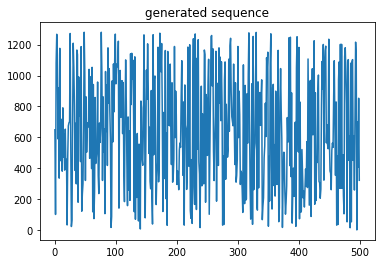

In [14]:
plt.figure()
plt.plot(gen_sequence)
plt.title('generated sequence')

In [11]:
IPython.display.Audio('generated_sound.wav')